<a href="https://colab.research.google.com/github/biteforceee/MachineLearning/blob/main/diabete_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## Описание задачи

Задача состоит в предсказании наличия или отсутствия диабета у пациента на основе различных медицинских и демографических показателей. Это задача бинарной классификации, где целевая переменная `diabetes` принимает значение 1 (наличие диабета) или 0 (отсутствие диабета).

Используемые признаки включают в себя: пол, возраст, наличие гипертонии, наличие болезни сердца, историю курения, индекс массы тела (ИМТ), уровень HbA1c и уровень глюкозы в крови.

# Описание столбцов (Features):
`gender` - Пол

Описание: Пол человека, который может влиять на предрасположенность к диабету. В наборе данных представлены три категории: male (мужской), female (женский) и other (другой).

`age` - Возраст

Описание: Важный фактор, так как диабет чаще диагностируется у пожилых людей. Возраст в наборе данных варьируется от 0 до 80 лет.

`hypertension` - Гипертония

Описание: Медицинское состояние, при котором артериальное давление постоянно повышено. Принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 — ее наличие.

`heart_disease` - Болезнь сердца

Описание: Еще одно медицинское состояние, связанное с повышенным риском развития диабета. Принимает значения 0 или 1, где 0 означает отсутствие болезни сердца, а 1 — ее наличие.

`smoking_history` - История курения

Описание: Курение считается фактором риска развития диабета и может усугублять связанные с ним осложнения. В наборе данных есть 5 категорий: not current (в настоящее время не курит), former (бывший курильщик), No Info (информация отсутствует), current (курит в настоящее время), never (никогда не курил) и ever (когда-либо курил).

`bmi` - Индекс массы тела (ИМТ)

Описание: Мера жира в организме, основанная на весе и росте. Более высокие значения ИМТ связаны с повышенным риском диабета. Диапазон ИМТ в наборе данных от 10.16 до 71.55. ИМТ менее 18.5 - недостаточный вес, 18.5-24.9 - нормальный, 25-29.9 - избыточный вес, а 30 и более - ожирение.

`HbA1c_level` - Уровень HbA1c

Описание: Показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокие уровни указывают на больший риск развития диабета. Как правило, уровень HbA1c более 6.5% указывает на диабет.

`blood_glucose_level` - Уровень глюкозы в крови

Описание: Количество глюкозы в кровотоке в данный момент времени. Высокий уровень глюкозы в крови является ключевым показателем диабета.

`diabetes` - Диабет

Описание: Целевая переменная (target), которую нужно предсказать. Принимает значения 1 (наличие диабета) и 0 (отсутствие диабета).



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/biteforceee/MachineLearning/master/diabetes_prediction_dataset.csv')

In [ ]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Бинаризация категроиальных признаков

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[['gender', 'smoking_history']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [ ]:
dummies = pd.DataFrame(enc.transform(data[['gender', 'smoking_history']]),
                       columns=enc.get_feature_names_out(), index=data.index)
dummies.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data = pd.concat((data, dummies), axis=1).drop(['gender', 'smoking_history'], axis=1)

In [ ]:
data


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0,0,17.37,6.5,100,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,66.0,0,0,27.83,5.7,155,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,24.0,0,0,35.42,4.0,100,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


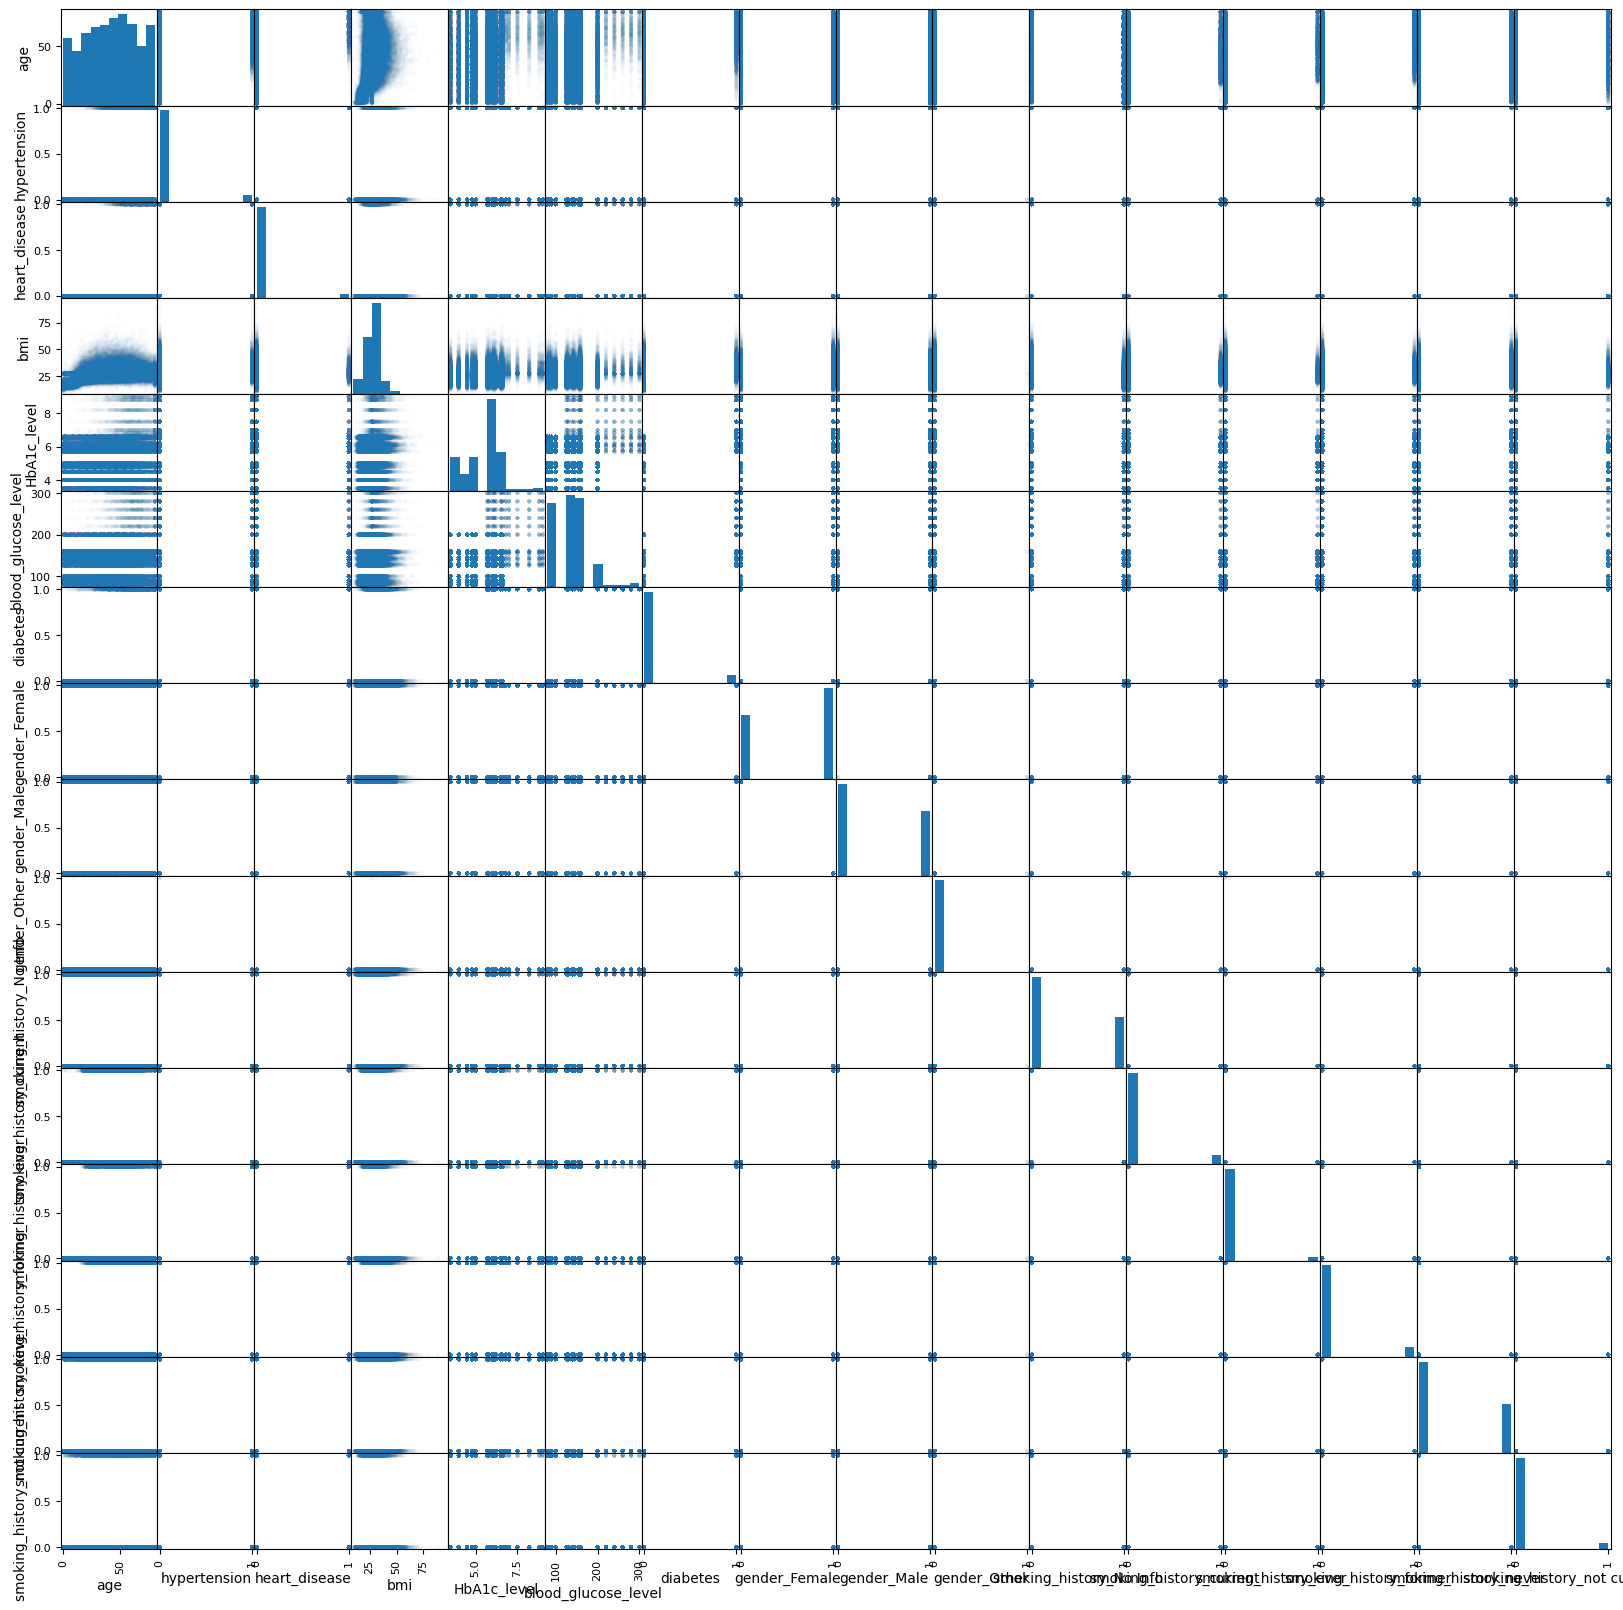

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (20, 20))
pass

In [ ]:
corr = data.corr()

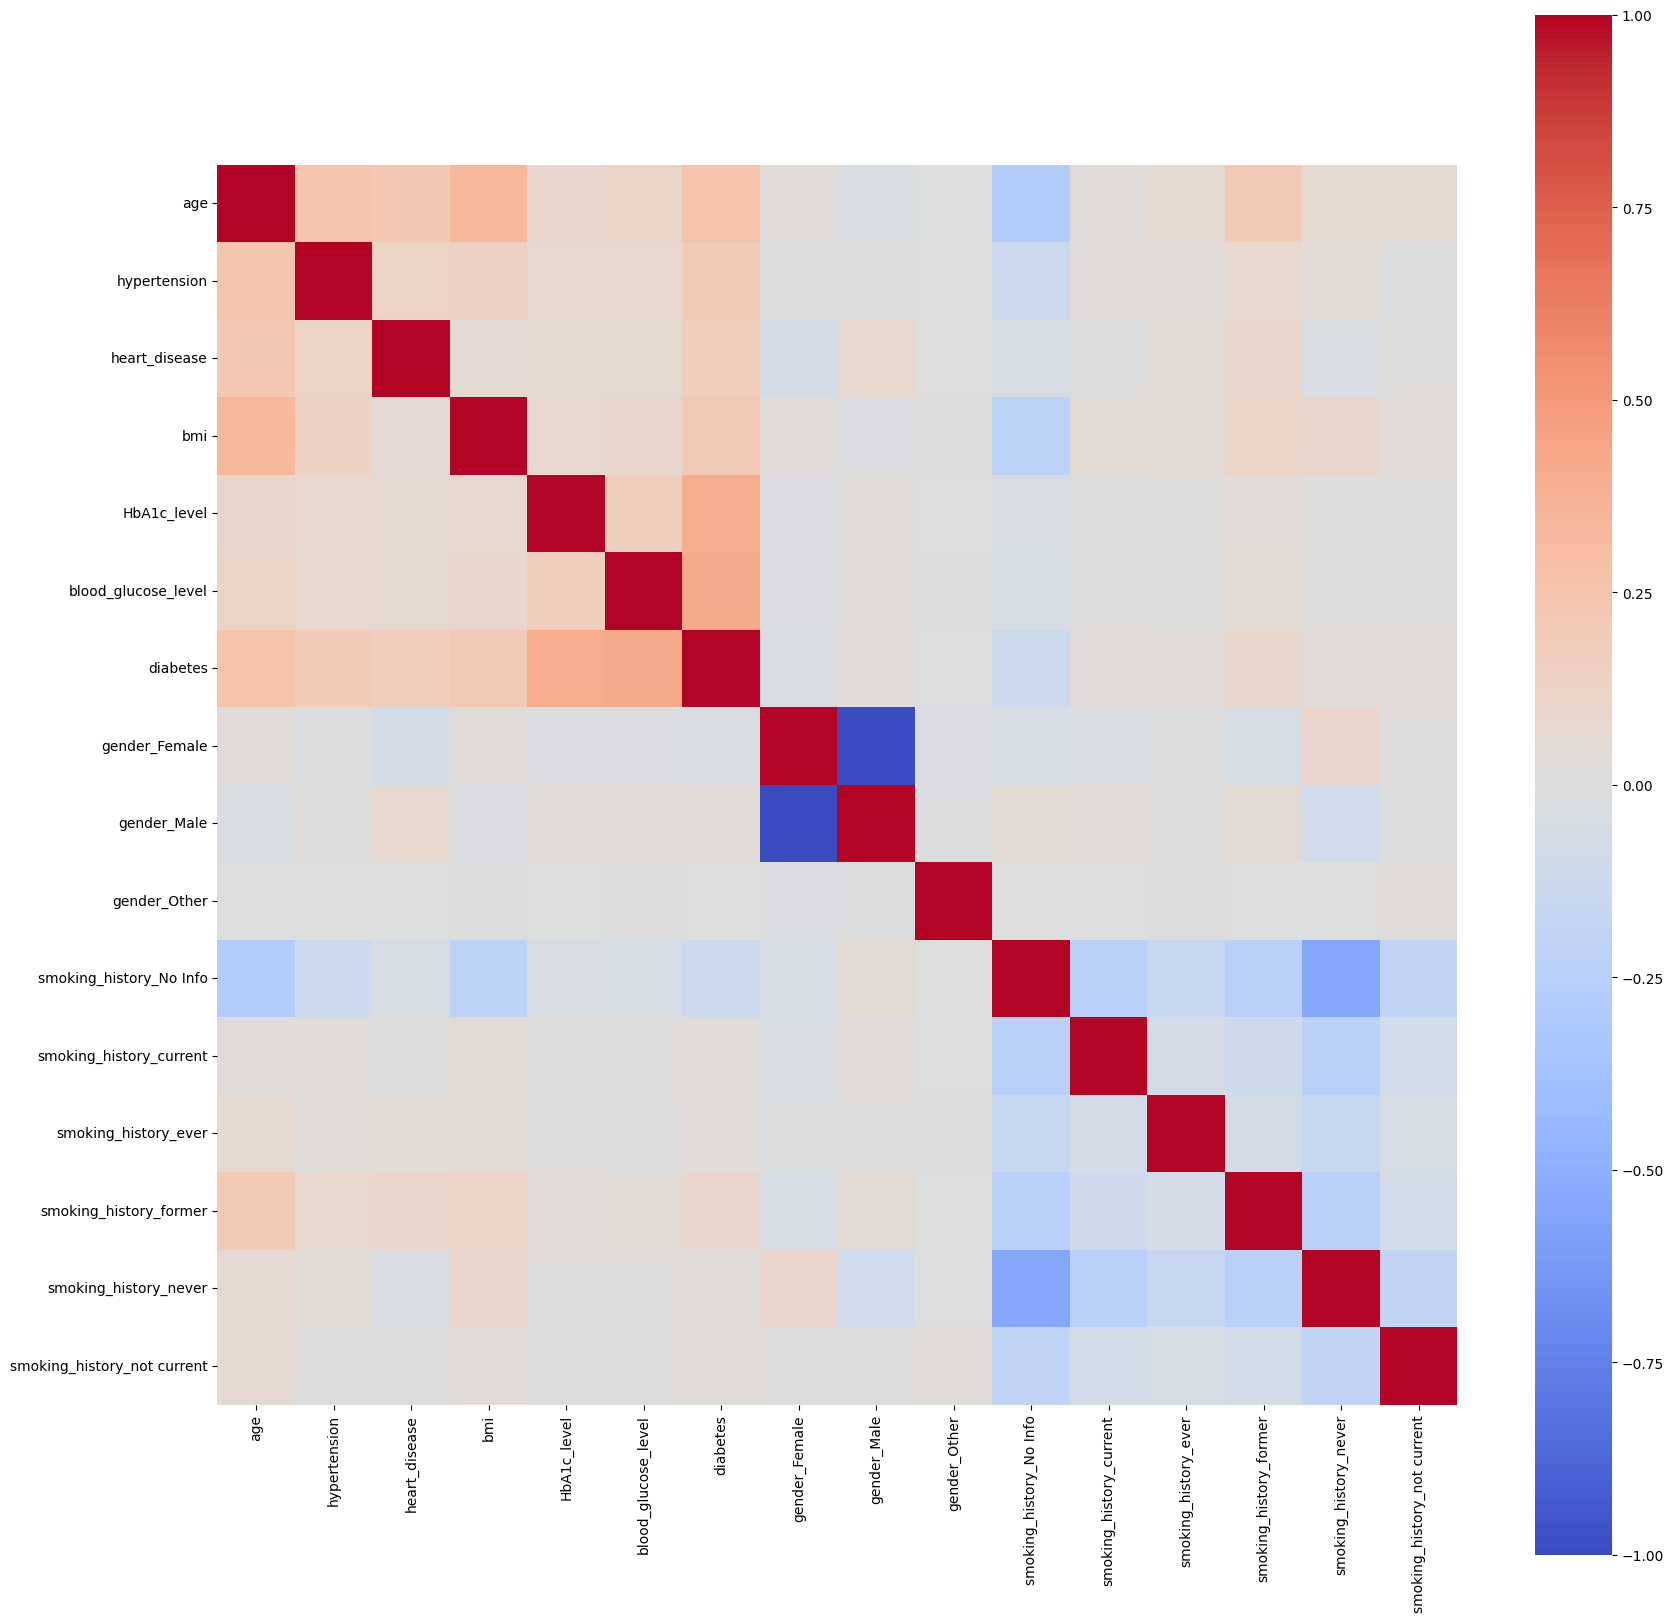

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, square=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
pass

Исходя из матрицы корреляции `corr`, можно сделать следующие выводы:

Целевая переменная `diabetes` имеет положительную корреляцию с:
`age`: С возрастом вероятность диабета увеличивается.
`hypertension`: Наличие гипертонии связано с более высокой вероятностью диабета.
`heart_disease`: Наличие болезни сердца также связано с более высокой вероятностью диабета.
`bmi`: Более высокий ИМТ связан с более высокой вероятностью диабета.
`HbA1c_level`: Высокий уровень `HbA1c` сильно коррелирует с наличием диабета, что ожидаемо, так как это прямой показатель уровня сахара в крови.
`blood_glucose_level`: Высокий уровень глюкозы в крови также сильно коррелирует с наличием диабета, что тоже является прямым показателем.
Наиболее сильные положительные корреляции с `diabetes` наблюдаются у признаков `HbA1c_level` и `blood_glucose_level`.
Между некоторыми признаками также есть корреляции:
age коррелирует с `hypertension`, `heart_disease`, `bmi`.
`hypertension` коррелирует с `heart_disease`.
`bmi` коррелирует с `age`.
Категориальные признаки, полученные после One-Hot Encoding (`gender_`..., `smoking_history_`...), имеют слабые корреляции с `diabetes` и между собой.
Некоторые признаки имеют очень слабую или практически нулевую корреляцию с `diabetes` и другими признаками. Это может указывать на то, что эти признаки менее важны для предсказания диабета в данной модели.
В целом, матрица корреляции подтверждает известные факторы риска диабета (возраст, гипертония, болезни сердца, ИМТ) и подчеркивает важность уровней `HbA1c` и глюкозы в крови для предсказания.

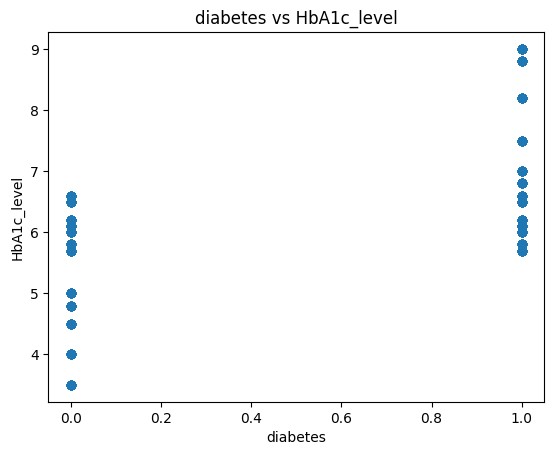

In [ ]:
plt.plot(data['diabetes'], data['HbA1c_level'], 'o', alpha = 0.05)
plt.xlabel('diabetes')
plt.ylabel('HbA1c_level')
plt.title('diabetes vs HbA1c_level')
pass

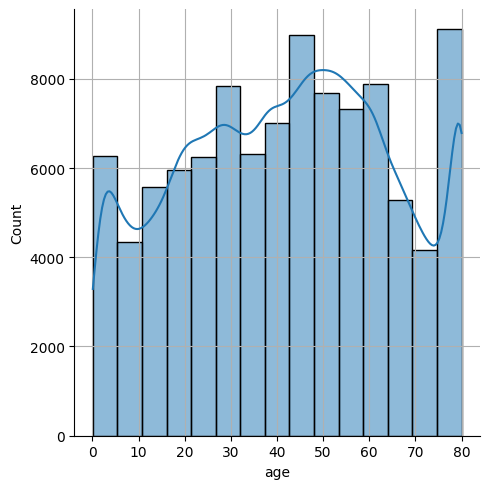

In [ ]:
sns.displot(data['age'], bins=15, kde=True)
plt.grid()
pass

По диаграмме рассеивания `diabetes` против `HbA1c_level` видно, что:

Когда `diabetes` равен 0 (нет диабета), уровень HbA1c_level в основном находится в диапазоне от 4 до 6.
Когда `diabetes` равен 1 (есть диабет), уровень `HbA1c_level` значительно выше, часто превышая 6 и доходя до 9.
Есть небольшое перекрытие между группами, но в целом более высокие уровни `HbA1c_level` четко связаны с наличием диабета.
По гистограмме распределения age видно, что:

Распределение возраста более или менее равномерное в диапазоне от 0 до примерно 70 лет.
Наблюдается небольшое снижение количества людей в возрасте старше 70 лет.

# Подготовка данных

In [ ]:
X = data.drop('diabetes', axis = 1)
y = data['diabetes']
feature_names = X.columns

## Скаляризация

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

## Разделение на тренировочные и тестовые выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

70000 30000


# Тесирование

## K - ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [ ]:
1 - err_test

np.float64(0.039933333333333335)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_train_predict = knn.predict(X_train)

In [ ]:
y_test_predict = knn.predict(X_test)

In [ ]:
(r2_score(y_test_predict, y_test), r2_score(y_train_predict, y_train))

(0.11972087558920097, 0.24204660476260853)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_test_predict)

print(confusion_matrix)

[[27413    40]
 [ 1158  1389]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.0007428571428571429,
 0.029666666666666668,
 0.9904530046913437,
 0.6181502537563183)

In [ ]:
knn.score(X_train, y_train) # Коэффициент детерминации R^2
knn.score(X_test, y_test)
#MSE_train = np.mean((y_train_predict - y_train)**2)
#MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(np.float64(0.0007428571428571429), np.float64(0.029666666666666668))

In [ ]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(np.float64(0.027255405754769875), np.float64(0.17224014243685085))

In [ ]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['kNN, all features', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"kNN, all features",0.026458,0.199833


In [ ]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['kNN, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"kNN, all features",0.991004,0.486004


## Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_train_predict = rf.predict(X_train)

In [ ]:
y_test_predict = rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
(r2_score(y_test_predict, y_test), r2_score(y_train_predict, y_train))

(0.4835042857673135, 0.9909388503853725)

In [ ]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [ ]:
err_test

np.float64(0.039933333333333335)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_test_predict)

print(confusion_matrix)

[[27413    40]
 [ 1158  1389]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.0007, 0.039933333333333335, 0.9910037928822277, 0.48600449887648234)

In [ ]:
rf.score(X_train, y_train) # Коэффициент детерминации R^2
rf.score(X_test, y_test)
#MSE_train = np.mean((y_train_predict - y_train)**2)
#MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(np.float64(0.0007), np.float64(0.039933333333333335))

In [ ]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(np.float64(0.026457513110645904), np.float64(0.19983326383095817))

In [ ]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Random forest, all features', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"kNN, all features",0.026458,0.199833


In [ ]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Random forest, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"kNN, all features",0.991004,0.486004
